In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

In [50]:
#Loading in data:
data = pd.read_excel('Data-2.xlsx')
data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,T1,T2,T3,T4,T5
0,3,2,1,3,2,2003,1300.0,1,1,2,10,10,1,2,NaN,NaN,1.0
1,3,1,1,3,2,2003,1300.0,1,1,2,10,10,1,2,NaN,NaN,1.0
2,3,1,1,3,2,2003,1300.0,1,1,2,10,10,1,2,NaN,NaN,1.0
3,1,1,1,2,1,2013,900.0,2,1,4,10,8,2,1,NaN,NaN,2.0
4,1,2,1,2,1,2013,900.0,2,1,4,10,8,2,1,NaN,NaN,2.0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q1      2235 non-null   int64  
 1   Q2      2235 non-null   int64  
 2   Q3      2235 non-null   int64  
 3   Q4      2235 non-null   int64  
 4   Q5      2235 non-null   int64  
 5   Q6      2235 non-null   int64  
 6   Q7      2234 non-null   float64
 7   Q8      2235 non-null   int64  
 8   Q9      2235 non-null   int64  
 9   Q10     2235 non-null   int64  
 10  Q11     2235 non-null   int64  
 11  Q12     2235 non-null   int64  
 12  T1      2235 non-null   int64  
 13  T2      2235 non-null   int64  
 14  T3      1179 non-null   float64
 15  T4      1179 non-null   float64
 16  T5      1648 non-null   float64
dtypes: float64(4), int64(13)
memory usage: 297.0 KB


In [52]:
#Note: We must consider that T3, T4, and T5 have some null data that is NaN
#Since imputing values of 0 would not be accurate to real life, the NaN data is kept for now

In [53]:
#Problem 1:
#Note - it is assumed this question is asking for a visual/subjective comparison, without objective hypothesis tests 
#Hypothesis tests are reserved for problem 2 instead 
#An important note is that when this question refers to categories, it means the possible answers to T1. T1 is the 
#question regarding environmental concerns
#1 - respondent is concerned, 2 - respondent is not concerned, 3 - respondent is not sure 
#In order to understand proportions among genders, we need to separate the data into answers of 1 & 2 for Q2
#Creating separate dataframes for answers of 1 and 2 for Q2
genddf_1 = data.loc[(data['Q2'] == 1)]
genddf_2 = data.loc[(data['Q2'] == 2)]
genddf_2   

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,T1,T2,T3,T4,T5
0,3,2,1,3,2,2003,1300.0,1,1,2,10,10,1,2,NaN,NaN,1.0
4,1,2,1,2,1,2013,900.0,2,1,4,10,8,2,1,NaN,NaN,2.0
5,1,2,1,2,1,2013,900.0,2,1,4,10,8,2,1,NaN,NaN,2.0
6,1,2,1,3,1,2016,1000.0,1,1,2,10,8,3,2,NaN,NaN,1.0
10,2,2,6,2,2,1982,2300.0,1,2,6,10,10,2,3,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,1,2,1,3,1,2018,1500.0,1,1,2,10,10,1,3,0.0,0.0,NaN
2221,1,2,1,4,1,2018,1300.0,1,1,4,10,10,1,3,1000.0,2000.0,NaN
2224,4,2,1,4,2,2019,800.0,1,1,2,8,9,1,3,NaN,NaN,NaN
2230,2,2,1,3,2,2019,800.0,1,1,2,10,10,3,2,400.0,3000.0,NaN


(0.0, 1.0)

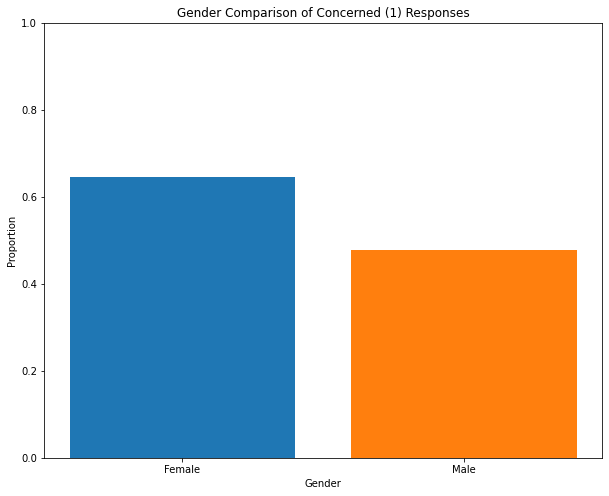

In [54]:
#To compare the ratios, we first calculate proportions of answers for each possible answer and gender
#Note - we must divide by lengths to get proportions
n1 = len(genddf_1.index)
n2 = len(genddf_2.index)
prop1_g1 = len(genddf_1.loc[(genddf_1['T1'] == 1)])/n1 #This is the proportion of gender 1 that responds with an answer of 1 for T1
prop2_g1 = len(genddf_1.loc[(genddf_1['T1'] == 2)])/n1
prop3_g1 = len(genddf_1.loc[(genddf_1['T1'] == 3)])/n1
prop2_g1 = prop2_g1 + prop3_g1 #Since we are grouping categories 2 and 3 together

prop1_g2 = len(genddf_2.loc[(genddf_2['T1'] == 1)])/n2 #This is the proportion of gender 2 that responds with an answer of 1 for T1
prop2_g2 = len(genddf_2.loc[(genddf_2['T1'] == 2)])/n2
prop3_g2 = len(genddf_2.loc[(genddf_2['T1'] == 3)])/n2
prop2_g2 = prop2_g2 + prop3_g2 #Since we are grouping categories 2 and 3 together


#Based upon the schema sheet, gender 1 is female and gender 2 is male
#Now, create a simple bar graph to compare these ratios:
plt.figure(figsize=(10,8))
plt.bar('Female',prop1_g1)
plt.bar('Male',prop1_g2)
plt.title('Gender Comparison of Concerned (1) Responses')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.ylim([0,1])


In [55]:
#Problem 2:
#With all these proprtions calculated, we can apply the 95% CI formula on the difference between proportions. This helps for
#The hypothesis test that determines if we can regard the ratios as the same or not. If we reject H_o, which is that the
#proportions are the same, then 0 would not be in the CI
#The hypothesis test is setup below:
#H_o: Estimated P1 - Estimated P2 = 0
#H_1: Estimated P1 - Estimated P2 =/= 0

#Calculated relevant z value:
ztop = (prop1_g1 - prop1_g2) - 0
zbot = np.sqrt((prop1_g1)*(1-prop1_g1)/n1 + prop1_g2*(1-prop1_g2)/n2)
zstat = ztop/zbot

In [56]:
#Assuming alpha = 0.05, the critical value to compare zstat to is 1.96 (since 2-tailed), since zstat = 8.01 > 1.96,
#we reject H_o and conclude that there is a statistically significant difference between the two ratios
#This rejection of H_o is also confirmed with a confidence interval, as shown below
ztop - zbot*1.96, ztop + zbot*1.96

(0.12524864451319273, 0.2063543355396793)

In [57]:
#Since in the confidence interval above, 0 (which is the null hypothesis of the difference) is not contained within it,
#this also confirms that we reject H_o and confirm that there is a statistically significant difference when alpha = 0.05

In [58]:
#Problem 3:
#Construct a random forest classifier model with T1 as the target variable and Q1 to Q5 as the independent variables.
#Sort the independent variables based on their feature importance in classifying T1.

#Before constructing the random forest classifier, we must first create the inputs we will use
#Note - there is no need to train-test split the data
p3data = pd.DataFrame()
p3data['Q1'] = data['Q1']
p3data['Q2'] = data['Q2']
p3data['Q3'] = data['Q3']
p3data['Q4'] = data['Q4']
p3data['Q5'] = data['Q5']
p3data['T1'] = data['T1']

#Then, split into x and y data for each
p3y = p3data.pop('T1')
p3x = p3data

#Standardize the x data for analysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
p3x_scaled = scaler.fit_transform(p3x)

In [59]:
#With the data in the form necessary for analysis, the random forest classifier can be utilized finally
#Note - feature importance will be calculated based on all the data 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 
rfc.fit(p3x_scaled, p3y)
importances = rfc.feature_importances_ 
importances

array([0.19785669, 0.07859763, 0.40463299, 0.22330656, 0.09560614])

In [60]:
#Sort importances for graphing, replace questions with their actual meanings
forest_importances = pd.Series(importances, index=['Age','Gender','Race','Income','Marital Status'])
forest_importances = forest_importances.sort_values(ascending=False)

Text(0, 0.5, 'Mean decrease in impurity')

<Figure size 1152x720 with 0 Axes>

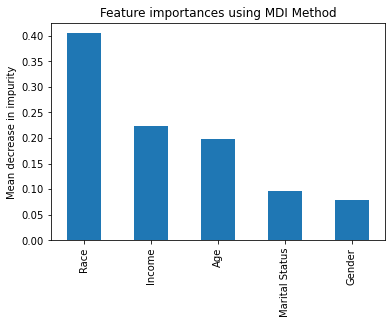

In [61]:
#Plotting the labelled and sorted importances
plt.figure(figsize=(16,10))
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI Method")
ax.set_ylabel("Mean decrease in impurity")

In [62]:
#Problem 4: Hypothesis testing with a 95% CI on the difference in the ratios, but comparing T5 based on Q2 (gender)
#We already have dataframes representing answers for each gender. These are shown below:
genddf_1 #female
genddf_2 #male

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,T1,T2,T3,T4,T5
0,3,2,1,3,2,2003,1300.0,1,1,2,10,10,1,2,NaN,NaN,1.0
4,1,2,1,2,1,2013,900.0,2,1,4,10,8,2,1,NaN,NaN,2.0
5,1,2,1,2,1,2013,900.0,2,1,4,10,8,2,1,NaN,NaN,2.0
6,1,2,1,3,1,2016,1000.0,1,1,2,10,8,3,2,NaN,NaN,1.0
10,2,2,6,2,2,1982,2300.0,1,2,6,10,10,2,3,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,1,2,1,3,1,2018,1500.0,1,1,2,10,10,1,3,0.0,0.0,NaN
2221,1,2,1,4,1,2018,1300.0,1,1,4,10,10,1,3,1000.0,2000.0,NaN
2224,4,2,1,4,2,2019,800.0,1,1,2,8,9,1,3,NaN,NaN,NaN
2230,2,2,1,3,2,2019,800.0,1,1,2,10,10,3,2,400.0,3000.0,NaN


In [63]:
#Cold and moderate (1 & 2) is one category, and hot (3) is the other category
#Proportion of category 1 and 2 for gender 1
propcat1_g1 = len(genddf_1.loc[(genddf_1['T1'] == 1)])/n1 + len(genddf_1.loc[(genddf_1['T1'] == 2)])/n1
propcat2_g1 = len(genddf_1.loc[(genddf_1['T1'] == 3)])/n1

#Proportion of category 1 and 2 for gender 2 
propcat1_g2 = len(genddf_2.loc[(genddf_2['T1'] == 1)])/n2 + len(genddf_2.loc[(genddf_2['T1'] == 2)])/n2
propcat2_g2 = len(genddf_2.loc[(genddf_2['T1'] == 3)])/n2

propcat1_g1, propcat1_g2

(0.8356164383561644, 0.869298245614035)

In [64]:
propcat2_g1, propcat2_g2

(0.1643835616438356, 0.1307017543859649)

(0.0, 1.0)

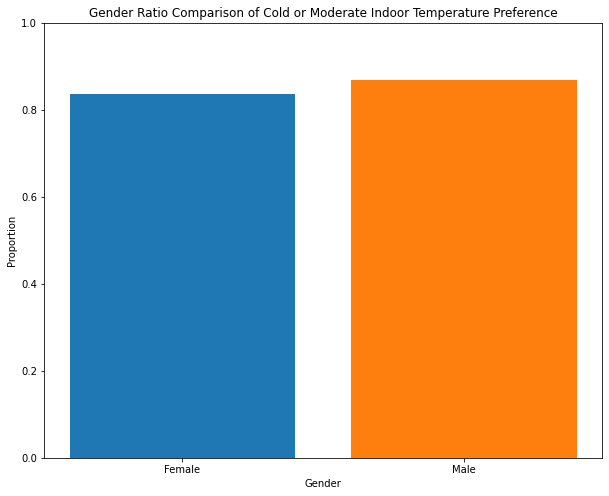

In [65]:
#With these proportions found, we graph them:
#Based upon the schema sheet, gender 1 is female and gender 2 is male
#Now, create a simple bar graph to compare these ratios:
plt.figure(figsize=(10,8))
plt.bar('Female',propcat1_g1)
plt.bar('Male',propcat1_g2)
plt.title('Gender Ratio Comparison of Cold or Moderate Indoor Temperature Preference')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.ylim([0,1])

In [66]:
#Now, calculate the 95% confidence interval
p4_diff = propcat1_g1 - propcat1_g2
std_err = np.sqrt((propcat1_g1)*(1-propcat1_g1)/n1 + propcat1_g2*(1-propcat1_g2)/n2)
CIlow = p4_diff - 1.96*std_err
CIhigh = p4_diff + 1.96*std_err
CIlow, CIhigh

(-0.0630889935970475, -0.0042746209186937355)

In [67]:
#H_o: Estimated P1 - Estimated P2 = 0
#H_1: Estimated P1 - Estimated P2 =/= 0
#Given that the confidence interval doesn't include 0, we can reject the null hypothesis and conclude that when
#alpha = 0.05, there is a statistically significant difference between the two gender-wise proportions for their
#indoor temp preferences

In [68]:
#Problem 5:
#First, we recategorize Q11 and Q12 into two main groups instead of 10, this is done via the pandas mapping too
#Group 1 response: values 1 to 5 and group 2: response values 6 to 10. 

#Construct the dictionary the dictates mapping the 10 values to groups 1 and 2
mapper = {1:1,2:1,3:1,4:1,5:1,6:2,7:2,8:2,9:2,10:2}

#Since we are using the mapper to determine ratios for the genders, we apply the mapper to each of the gender dataframes
genddf_1['Q11'] = genddf_1.Q11.map(mapper)
genddf_1['Q12'] = genddf_1.Q12.map(mapper)
genddf_2['Q11'] = genddf_2.Q11.map(mapper)
genddf_2['Q12'] = genddf_2.Q12.map(mapper)

genddf_2 #We output just to make sure everything has been mapped as planned

C:\Users\jacob\AppData\Local\Temp/ipykernel_17784/1409713157.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genddf_1['Q11'] = genddf_1.Q11.map(mapper)
C:\Users\jacob\AppData\Local\Temp/ipykernel_17784/1409713157.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genddf_1['Q12'] = genddf_1.Q12.map(mapper)
C:\Users\jacob\AppData\Local\Temp/ipykernel_17784/1409713157.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,T1,T2,T3,T4,T5
0,3,2,1,3,2,2003,1300.0,1,1,2,2,2,1,2,NaN,NaN,1.0
4,1,2,1,2,1,2013,900.0,2,1,4,2,2,2,1,NaN,NaN,2.0
5,1,2,1,2,1,2013,900.0,2,1,4,2,2,2,1,NaN,NaN,2.0
6,1,2,1,3,1,2016,1000.0,1,1,2,2,2,3,2,NaN,NaN,1.0
10,2,2,6,2,2,1982,2300.0,1,2,6,2,2,2,3,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2220,1,2,1,3,1,2018,1500.0,1,1,2,2,2,1,3,0.0,0.0,NaN
2221,1,2,1,4,1,2018,1300.0,1,1,4,2,2,1,3,1000.0,2000.0,NaN
2224,4,2,1,4,2,2019,800.0,1,1,2,2,2,1,3,NaN,NaN,NaN
2230,2,2,1,3,2,2019,800.0,1,1,2,2,2,3,2,400.0,3000.0,NaN


In [69]:
#We now calculate the relevant proportions for the hypothesis test
p1g1 = len(genddf_1.loc[(genddf_1['Q11'] == 1)])/n1
p2g1 = len(genddf_1.loc[(genddf_1['Q12'] == 1)])/n1

p1g2 = len(genddf_2.loc[(genddf_2['Q11'] == 1)])/n2
p2g2 = len(genddf_2.loc[(genddf_2['Q12'] == 1)])/n2

In [70]:
#First, perform the hypothesis test (which has the same H_o and H_1 as previous hypothesis tests) for Q11:
p5_diff = p1g1 - p1g2
std_err = np.sqrt((p1g1)*(1-p1g1)/n1 + p1g2*(1-p1g2)/n2)
CIlow = p5_diff - 1.96*std_err
CIhigh = p5_diff + 1.96*std_err
CIlow, CIhigh #The outputted 95% CI shows us that we can reject H_o for Q11 since it doesn't contain 0

(-0.06506254383746893, -0.02700667029374952)

In [71]:
#Next, perform the hypothesis test (which has the same H_o and H_1 as previous hypothesis tests) for Q12:
p5_diff = p2g1 - p2g2
std_err = np.sqrt((p2g1)*(1-p2g1)/n1 + p2g2*(1-p2g2)/n2)
CIlow = p5_diff - 1.96*std_err
CIhigh = p5_diff + 1.96*std_err
CIlow, CIhigh #The outputted 95% CI shows us that we cannot reject H_o since the CI contains 0

(-0.014929708038469084, 0.00957041940592883)

Text(0.5, 0, 'Gender')

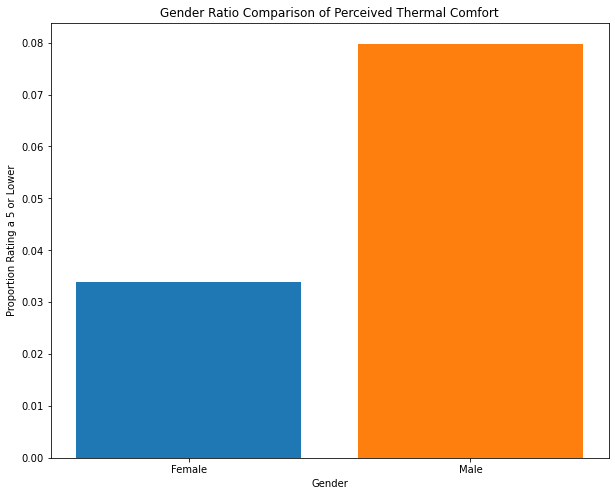

In [72]:
#Creating relevant graphs:
plt.figure(figsize=(10,8))
plt.bar('Female',p1g1)
plt.bar('Male',p1g2)
plt.title('Gender Ratio Comparison of Perceived Thermal Comfort')
plt.ylabel('Proportion Rating a 5 or Lower')
plt.xlabel('Gender')

Text(0.5, 0, 'Gender')

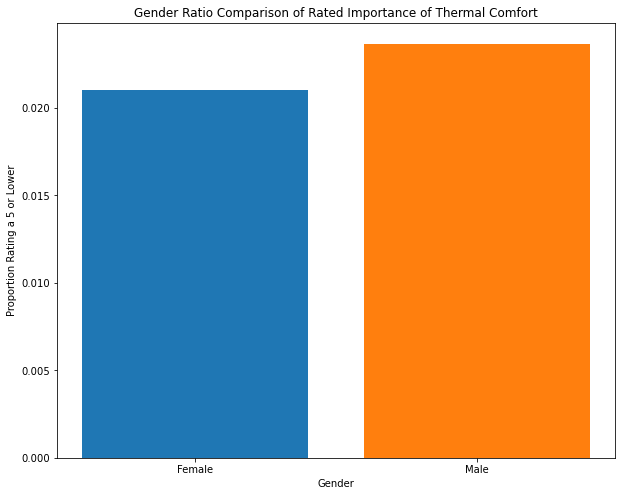

In [73]:
#Creating relevant graphs:
plt.figure(figsize=(10,8))
plt.bar('Female',p2g1)
plt.bar('Male',p2g2)
plt.title('Gender Ratio Comparison of Rated Importance of Thermal Comfort')
plt.ylabel('Proportion Rating a 5 or Lower')
plt.xlabel('Gender')

In [74]:
#Problem 6: We follow a similar process to P3, but create different dataframes for the analysis.
#Once again, the final aim is to rate the features in terms of importance, so that we can analyze the results.

#Before constructing the random forest classifier, we must first create the inputs we will use
#Note - there is no need to train-test split the data
p6data = pd.DataFrame()
p6data['Q1'] = data['Q1']
p6data['Q2'] = data['Q2']
p6data['Q3'] = data['Q3']
p6data['Q4'] = data['Q4']
p6data['Q5'] = data['Q5']
p6data['Q6'] = data['Q6'] 
p6data['Q8'] = data['Q8']
p6data['Q9'] = data['Q9']
p6data['T2'] = data['T2']

#Then, split into x and y data for each
p6y = p6data.pop('T2')
p6x = p6data

#Standardize the x data for analysis
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
p6x_scaled = scaler.fit_transform(p6x)

In [75]:
#With the data in the form necessary for analysis, the random forest classifier can be utilized finally

rfc = RandomForestClassifier()
rfc.fit(p6x_scaled, p6y)
importances = rfc.feature_importances_ 
importances

array([0.11407281, 0.04912117, 0.2370827 , 0.11546454, 0.04341399,
       0.28603154, 0.09353452, 0.06127873])

In [76]:
#Sort importances for graphing, replace questions with their actual meanings
forest_importances = pd.Series(importances, index=['Age','Gender','Race','Income','Marital Status','House Construction Yr',
                                                  'Owned or Rental','Modern Structure'])
forest_importances = forest_importances.sort_values(ascending=False)

Text(0, 0.5, 'Mean decrease in impurity')

<Figure size 1152x720 with 0 Axes>

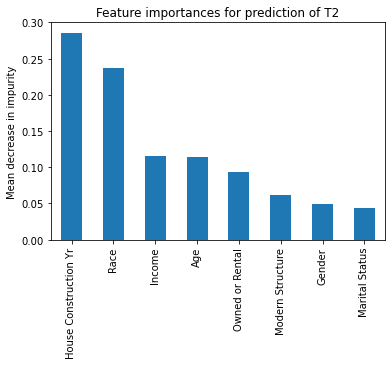

In [77]:
#Plotting the labelled and sorted importances
plt.figure(figsize=(16,10))
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances for prediction of T2")
ax.set_ylabel("Mean decrease in impurity")

In [78]:
#Problem 7:
#First, in the main dataframe (called data), we average T3 and T4 and add the result as a new column
data['T3-T4 Average'] = (data['T3'] + data['T4'])/2

#Next, we remove the null values in the T3-T4 Average Column:
#Note, that before we drop the null values we are going to remove the T5 column since it has nulls that do not necessarily
#align with the T3 and T4 nulls and T5 isn't used in P7. This null discrepancy was shown in data.info() earlier on
del data['T5']
no_nulls_data = data.dropna()
no_nulls_data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,T1,T2,T3,T4,T3-T4 Average
9,2,1,1,4,1,1980,1200.0,1,2,2,10,10,1,2,700.0,2800.0,1750.0
11,2,1,1,2,2,1985,1500.0,1,2,2,8,9,2,3,2000.0,4000.0,3000.0
12,2,2,1,2,1,1985,2200.0,1,2,2,10,10,1,3,2000.0,5000.0,3500.0
13,1,2,1,4,1,1985,1200.0,1,1,4,10,10,3,3,0.0,0.0,0.0
14,2,1,1,1,1,1990,1000.0,1,2,4,10,10,3,3,500.0,1000.0,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,2,2,1,3,2,2019,800.0,1,1,2,10,10,3,2,400.0,3000.0,1700.0
2231,1,1,1,3,1,2019,800.0,1,1,2,9,9,1,3,500.0,3000.0,1750.0
2232,5,1,1,3,1,2019,800.0,1,1,2,10,10,1,3,500.0,2500.0,1500.0
2233,1,2,1,4,1,2019,1200.0,1,1,4,10,10,1,3,1000.0,4500.0,2750.0


In [79]:
#Next, we normalize the data based on the floor area of the houses (Q7)
#To do this, we divide the average by the Q7 value of square footage
no_nulls_data['T3-T4 Average'] = no_nulls_data['T3-T4 Average']/no_nulls_data['Q7']

#Create a random forest regressor, and sort the feature importance based on the normalized value as the target 
#and Q6, Q8, Q9, and Q10.
#With this done, the next step is to define the relevant x and y data for the random forest regressor
p7x = pd.DataFrame()
p7x['Q6'] = no_nulls_data['Q6']
p7x['Q8'] = no_nulls_data['Q8']
p7x['Q9'] = no_nulls_data['Q9']
p7x['Q10'] = no_nulls_data['Q10']

p7y = no_nulls_data['T3-T4 Average']

#Standardize the x data for analysis
scaler = StandardScaler()
p7x_scaled = scaler.fit_transform(p7x)

C:\Users\jacob\AppData\Local\Temp/ipykernel_17784/1118304697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_nulls_data['T3-T4 Average'] = no_nulls_data['T3-T4 Average']/no_nulls_data['Q7']


In [81]:
#With the data in the form necessary for analysis, the random forest classifier can be utilized finally
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor() 
rfc.fit(p7x_scaled, p7y)
importances = rfc.feature_importances_ 
importances

array([0.49538541, 0.30389252, 0.0398287 , 0.16089338])

In [82]:
#Sort importances for graphing, replace questions with their actual meanings
forest_importances = pd.Series(importances, index=['House Construction Yr','Owned or Rental','Modern Structure',
                                                  'AC Technology'])
forest_importances = forest_importances.sort_values(ascending=False)

Text(0, 0.5, 'Mean decrease in impurity')

<Figure size 1152x720 with 0 Axes>

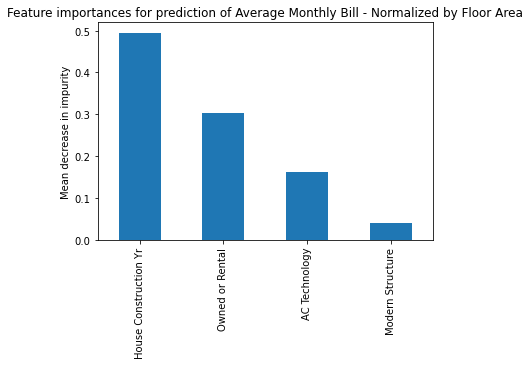

In [83]:
#Plotting the labelled and sorted importances
plt.figure(figsize=(16,10))
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances for prediction of Average Monthly Bill - Normalized by Floor Area")
ax.set_ylabel("Mean decrease in impurity")